In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Step 1: Transmitter Placement

$$R_F>\frac{2D^2}{\lambda}$$

$$R_{min}\approx 5D$$


$$R_{react}<0.62\sqrt{\frac{D^3}{\lambda}}$$

**Parameters:**

$D$ is the diameter of the antenna aperture

$\lambda$ is the wavelength at which holography is being done

$\nu$ is the frequency at which holography is being done

$c = 3\cdot10^8$ is the speed of light


In [10]:
# Parameters
D = 12 # m
nu = 104.02 # GHz
c = 3 * 10**8 # m/s

# Wavelength
lam = c/(nu*10**9) # m

# Far-field cutoff
R_F = (2*D**2)/lam # m

print('R_F = ' + str(R_F) + ' m')

# Minimum transmitter distance
R_min = 5*D # m

print('R_min = ' + str(R_min) + ' m')

# Reactive near-field cutoff
R_react = 0.62*np.sqrt(D**3/lam) # m

print('R_react = ' + str(R_react) + ' m')

R_F = 99859.2 m
R_min = 60 m
R_react = 479.91171988189654 m


# Step 2: Spatial Resolution

$$\delta d <\frac{a\sqrt{2}}{2}$$

**Parameters:**

$\delta d$ is the spatial resolution

$a$ is the distance between corner adjusters


In [11]:
# Parameters
a = 0.2828712 # m

# Spatial resolution
delta_d = a*np.sqrt(2)/2 *10**2 # cm

print("delta_d < " + str(delta_d) + ' cm')

delta_d < 20.00201437223761 cm


# Step 3: Grid Point Integration Time and Total Map Time

$$\Delta t_{map} = \frac{171768 f_{osr} f_1 f_{apo}^2 D(m)}{\dot{\theta}(\text{arcsec/sec}) \nu (\text{GHz}) (\delta d (\text{cm}))^2} \text{hours}$$

$$t_{int} = \frac{6.2 \cdot 10^4 f_{osr} f_1 f_{apo}^2}{\dot{\theta}(\text{arcsec/sec}) \nu(\text{GHz}) D(\text{m})} \text{seconds}$$

**Parameters:**

$f_1$ is the primary beam taper factor

$f_{apo}$ is an apodization smoothing factor used in holography imaging to dampen ringing on the edge of the aperture (equal to 1.3)

$f_{osr}$ is the oversampling factor between rows

$f_{oss}$ is the oversampling factor along a row

$\dot{\theta}$ is the chosen rotation rate of the dish antenna

$t_{row}$ is the time it takes to measure one holography row

$t_{int}$ is the integration time per image grid point

$\Delta t_{map}$ is the total time it takes to measure one holography map


In [12]:
# Parameters
f_1 = 1.13
f_apo = 1.3  
f_osr = 2.2
dtheta = 300 # arcsec/sec

# Integration time
t_int = 6.2*10**4*f_osr*f_1*f_apo**2 / (dtheta*nu*D) # seconds


print('t_int = ' + str(t_int) + ' seconds')

# Total map time
t_map = 171768 * f_osr * f_1 * f_apo**2 * D / (dtheta * nu * delta_d**2) # hours

print('t_map = ' + str(t_map) + ' hrs')

t_int = 0.6956009528082207 seconds
t_map = 0.6936266321326223 hrs


# Step 4: Angular Extent of Map and Sampling Intervals

$$\delta d = \frac{D}{N_{row}} = \frac{f_1 f_{apo} c}{\nu \theta_{ext}}$$

$$\theta_{ext} = \frac{f_1 f_{apo} c}{\nu \delta_d} \text{deg}$$

$$\theta_{b} = \frac{61836.6 f_1 }{\nu(\text{GHz}) D (\text{m})} \text{arcsec}$$

$$\theta_{sr} = \frac{\theta_b}{f_{osr}} \text{arcsec}$$

$$\theta_{ss} = \frac{\theta_b}{f_{oss}} \text{arcsec}$$

**Parameters:**

$\theta_{ext}$ is the angular extent of the holography map

$\theta_b$ is the primary angular beam size of a single grid point on the aperture

$\theta_{sr}$ is the angular sampling interval between map rows

$\theta_{ss}$ is the sampling interval along a row

$\theta_{ss}$ is the sampling interval along a scan

In [13]:
# Parameters
f_oss = 15  

# Angular extent of map
theta_ext = 1717.7*f_1*f_apo/(delta_d*nu) # deg
print('theta_ext = ' + str(theta_ext) + ' deg')

# Beamwidth
theta_b = 61836.6*f_1/(nu*D) # arcsec

print('theta_b = ' + str(theta_b) + ' arcsec')

# Sampling interval between rows
theta_sr = theta_b/f_osr # arcsec

print('theta_sr = ' + str(theta_sr) + ' arcsec')

# Sampling interval along scan
theta_ss = theta_b/f_oss # arcsec

print('theta_ss = ' + str(theta_ss) + ' arcsec')

theta_ext = 1.212770227932177 deg
theta_b = 55.97910497981157 arcsec
theta_sr = 25.445047718096166 arcsec
theta_ss = 3.731940331987438 arcsec


# Step 5: Pointing Accuracy and SNR Requirement

$$\theta_{\text{point}} < \frac{180 \delta_z \nu}{c} = (6 \cdot 10^{-4}) \delta_{z}(\mu m) \nu(GHz) \, \text{deg}$$

$$N_{row} = \frac{D f_{apo} f_{osr}}{\delta d}$$

$$\delta_z = \frac{\lambda}{16 \sqrt{2}} \sqrt{\frac{N_{row}^2}{f_{osr} f_{oss}}} \frac{1}{\text{SNR}} \frac{1}{\sqrt{f_{apo}}}$$

**Parameters:**

$\theta_{point}$ is the phase accuracy requirement of the transmitter

$N_{row}$ is the number of final grid points in a row of the holography map

$SNR$ is the signal-to-noise ratio

$\delta_z$ is the surface deformation of the holography map


In [14]:
# Parameters
delta_z = 5  # um

# Pointing accuracy requirement
theta_point = 6 * 10**-4 * delta_z * nu  # deg
print("theta_point < " + str(theta_point) + " deg")

# Total number of grid points
N_row = D / (delta_d * 10**-2) * f_apo * f_osr
print("N_row = " + str(N_row))

# Calculate SNR
SNR = 10 * np.log10(0.044 * lam * np.sqrt(N_row**2 / (f_oss * f_osr)) * 1 / delta_z * 1 / np.sqrt(f_apo) * 10**6)  # dB
print("SNR > " + str(SNR) + " dB")

theta_point < 0.31206 deg
N_row = 171.58271842677738
SNR > 28.22731975516623 dB


# Step 6: Transmitter Output Power

$$\text{Noise Floor} = 10 \log{\left(\frac{k B T_{sys}}{1 \text{mW}}\right)}$$

$$w(z) = w_0 \sqrt{1 + \left( \frac{z}{z_R} \right)^2}$$

$$z_R = \frac{\pi w_0^2 c}{\nu}$$

$$\eta = \frac{\left|\int_{\text{aperture}} E_{TX}(\mathbf{r}) E_{RX}^*(\mathbf{r}) \, d\mathbf{r}\right|^2}{\int_{\text{aperture}} |E_{TX}(\mathbf{r})|^2 \, d\mathbf{r} \int_{\text{aperture}} |E_{RX}(\mathbf{r})|^2 \, d\mathbf{r}}$$

$$\text{Overlap} = \int_0^{D/2} r \exp\left(-\frac{2 r^2}{w(z)^2}\right) \, dr$$

$$P_{\text{total}} = \frac{\pi w(z)^2}{2}$$

$$\eta = 10 \log{\left( \frac{\text{Overlap}}{P_{\text{total}}} \right)^2}$$

$$P_{\text{dB}} = \text{Noise Floor} + \text{SNR} + \eta + G$$

**Parameters:**

$B$ is the detector bandwidth

$T_{sys}$ is the system temperature

$k$ is Boltzmann’s constant

$z$ distance between the transmitter and receiver

$w(z)$ the beam radius at a distance $z$ from the transmitter 

$D_t$ is the transmitter diameter

$w_0$ is the beam waist at the transmitter ($w_0 = D_t/2$)

$z_R$ is the Rayleigh range, which is the distance over which the beam radius approximately doubles

$E(r)$ is the electric field strength as a function of radial distance $r$ from the beam's center for the transmitter (TX) and receiver (RX)

$\eta$ is the beam-coupling efficiency, which quantifies how effectively the transmitted beam's energy is captured by the receiving aperture

$P_{\text{total}}$ is the total power in a Gaussian beam

$P_{\text{dB}}$ is the transmitter output power

$G$ is the system gain


In [15]:
# Parameters
k = 1.38 * 10**-23 # J/K
B = 0.01 # MHz
T_sys = 3600 # K
G = 33 # dB
D_t = 0.02126 # m
z = 315  # m

# Noise floor
noise_floor = 10*np.log10(k*B*10**6*T_sys/(1*10**-3)) # dBm

print("Noise Floor = " + str(noise_floor) + " dB")

# Beam waist at the transmitter
w_0 = D_t / 2  # m

print("w_0 = " + str(w_0) + " m")

# Rayleigh range
z_R = np.pi * w_0**2 / lam # m

print("z_R = " + str(z_R) + " m")

# Beam radius at the receiver location
w_z = w_0 * np.sqrt(1 + (z / z_R)**2) # m

print("w_z = " + str(w_z) + " m")

# Calulating beam-coupling efficency
# Define the integrand function for overlap integral
def integrand(r, theta):
    # Compute the Gaussian field amplitude squared
    amplitude_squared = np.exp(-r**2 / w_z**2)
    return r * amplitude_squared

# Calculate the overlap integral over the aperture
overlap, _ = dblquad(integrand, 0, D/2, lambda theta: 0, lambda theta: 2*np.pi)

# Beam-coupling efficiency
eta = (overlap / (np.pi * w_z**2 / 2))**2
eta_dB = 10 * np.log10(eta) # dB

print("eta = " + str(eta_dB) + " dB")

# Output power
P_dB = noise_floor + SNR + eta_dB + G # dB

print("P_dB = " + str(P_dB) + " dB")

# Output power in Watts
P = (1*10**-3) * 10**(P_dB/10) # W

print("P = " + str(P) + " W")


Noise Floor = -123.03818412831477 dB
w_0 = 0.01063 m
z_R = 0.12308694606711368 m
w_z = 27.203942925085745 m
eta = -20.068697658678193 dB
P_dB = -81.87956203182672 dB
P = 6.48699848969e-12 W


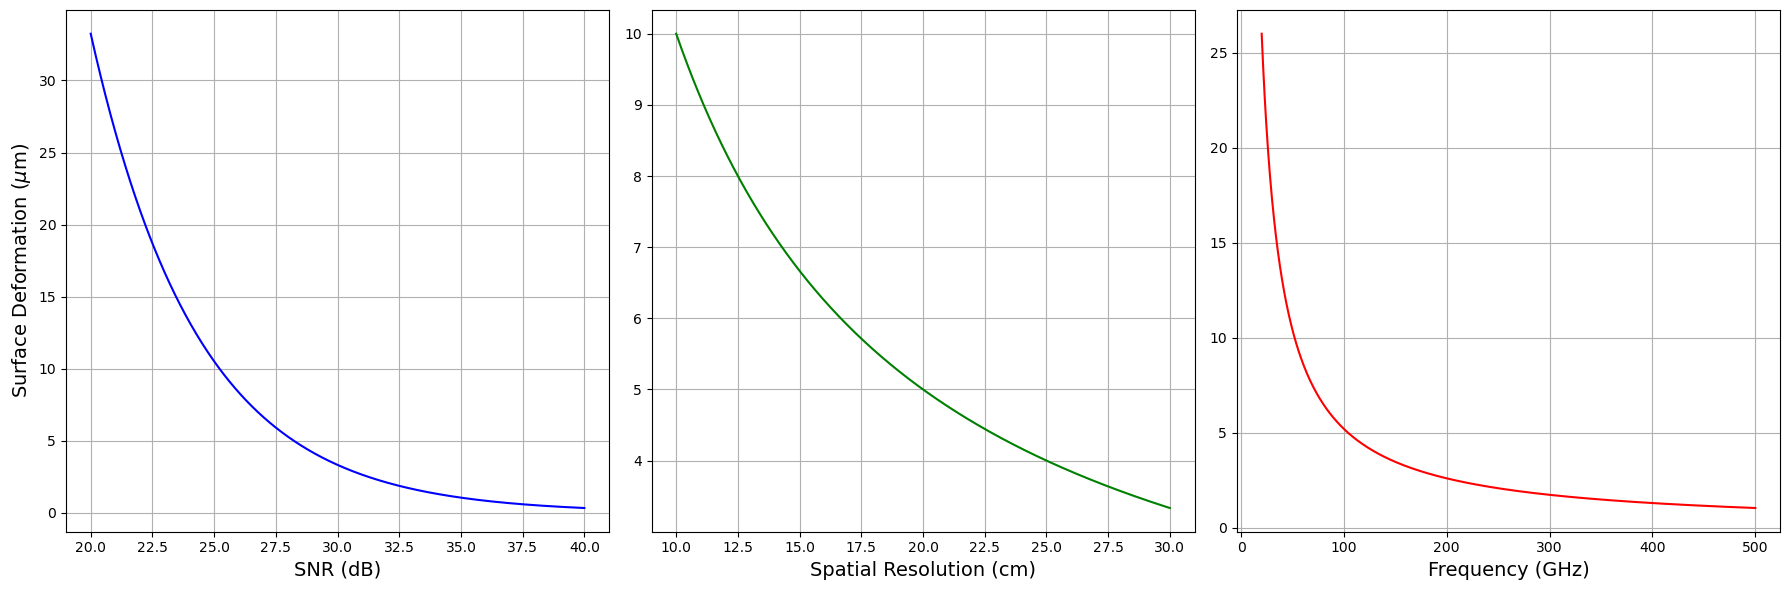

In [16]:
# Example plotting code

# Subplot 1: SNR vs Surface Deformation
SNR_array = np.linspace(20, 40, 1000) # dB
delta_z_array = 0.044 * lam * np.sqrt(N_row**2 / (f_oss * f_osr)) * 1 / (10**(SNR_array/10)) * 1 / np.sqrt(f_apo) * 1e6 # um

# Subplot 2: Spatial Resolution vs Surface Deformation
delta_d_array = np.linspace(10, 30, 1000) # cm
N_row_array = D / (delta_d_array * 1e-2) * f_apo * f_osr
delta_z_array2 = 0.044 * lam * np.sqrt(N_row_array**2 / (f_oss * f_osr)) * 1 / (10**(SNR/10)) * 1 / np.sqrt(f_apo) * 1e6 # um

# Subplot 3: Frequency vs Surface Deformation
nu_array = np.linspace(20, 500, 1000)  # GHz
lam_array = c / (nu_array * 1e9)       # m
delta_z_array3 = 0.044 * lam_array * np.sqrt(N_row**2 / (f_oss * f_osr)) * 1 / (10**(SNR/10)) * 1 / np.sqrt(f_apo) * 1e6 # um

# Create a single figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot on the first subplot (SNR vs Surface Deformation)
axs[0].plot(SNR_array, delta_z_array, linestyle='-', color='b')
axs[0].set_xlabel(r'SNR (dB)', fontsize=14)
axs[0].set_ylabel(r'Surface Deformation ($\mu$m)', fontsize=14)
axs[0].grid(True)

# Plot on the second subplot (Spatial Resolution vs Surface Deformation)
axs[1].plot(delta_d_array, delta_z_array2, linestyle='-', color='g')
axs[1].set_xlabel(r'Spatial Resolution (cm)', fontsize=14)
# axs[1].set_ylabel(r'Surface deformation ($\mu$m)', fontsize=14)
axs[1].grid(True)

# Plot on the third subplot (Frequency vs Surface Deformation)
axs[2].plot(nu_array, delta_z_array3, linestyle='-', color='r')
axs[2].set_xlabel(r'Frequency (GHz)', fontsize=14)
# axs[2].set_ylabel(r'Surface deformation ($\mu$m)', fontsize=14)
axs[2].grid(True)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()
fig.savefig('deltaZ_vs.png', transparent=True)